In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_parquet(r'D:\University\Y4S1\QBUS4934\data\new data\COVID_Cases_Restricted_Details_03312021_Part_3_parquetnew.parquet')

In [3]:
df.head().T

index,33,34,36,38,481
race_ethnicity_combined,"Asian, Non-Hispanic","Asian, Non-Hispanic","Asian, Non-Hispanic","Multiple/Other, Non-Hispanic",NA
current_status,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case
cdc_case_earliest_dt,2021-01-31 00:00:00,2021-02-08 00:00:00,2020-12-28 00:00:00,2021-02-24 00:00:00,2021-01-23 00:00:00
cdc_report_dt,2021-01-31 00:00:00,2021-02-08 00:00:00,2020-12-28 00:00:00,2021-02-24 00:00:00,2021-01-23 00:00:00
sex,Male,Male,Male,Female,Male
onset_dt,2021-01-31 00:00:00,2021-02-08 00:00:00,2020-12-28 00:00:00,NaT,2021-01-23 00:00:00
pos_spec_dt,2021-02-01,2021-02-08,2021-01-04,2021-02-24,2021-01-24
hosp_yn,No,No,No,Yes,No
icu_yn,Unknown,Unknown,Unknown,Yes,Missing
death_yn,No,No,No,Yes,No


In [4]:
df['current_status'].value_counts(dropna=False)

Laboratory-confirmed case    239785
Probable Case                 47426
Name: current_status, dtype: int64

In [5]:
df['sex'].value_counts(dropna=False)

Female     153471
Male       132351
NA           1032
Missing       253
Unknown       101
Other           3
Name: sex, dtype: int64

In [6]:
df['res_county'].value_counts(dropna=False)

CLARK       32454
CUYAHOGA    11145
DAVIS        8809
SUMMIT       6836
FRANKLIN     6534
            ...  
LYON            1
VILLALBA        1
FLORIDA         1
ALBANY          1
YAKIMA          1
Name: res_county, Length: 450, dtype: int64

In [7]:
df['res_state'].value_counts(dropna=False)

OH    81366
NC    72340
PA    43821
NV    36801
AR    21949
UT    21199
VT     8143
AK      575
NY      336
GU      182
PR      176
KS       98
DC       64
NH       35
MA       31
NA       31
NJ       20
CT       14
WA       14
CA        5
FL        4
TX        3
VA        1
IN        1
SC        1
AL        1
Name: res_state, dtype: int64

In [8]:
len(df['res_state'].value_counts(dropna=False))

26

NTS: Could be interesting to look at date vs geographical location

Measuring correlation between 'county_fips_code', 'res_county', 'res_state'
* country_FIPS_code should demonstrate multicollinearity wth res_state

In [9]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=df['county_fips_code'],columns=df['res_county'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


In [10]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=df['county_fips_code'],columns=df['res_state'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


In [11]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=df['res_county'],columns=df['res_state'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


Since 'county_fips_code' is already technically in binary encoding, only 'res_county' and 'res_state' require encoding. They will be target encoded because high cardinality. Target variable, 'pna_yn' will be dummy encoded.

https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64
https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b
https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

In [12]:
target = df['pna_yn']
target = pd.get_dummies(target, drop_first=True)
target.head(5)

,Yes
index,
33,0
34,0
36,0
38,1
481,0


In [13]:
df['pna_yn_yes'] = target
df = df.drop(['pna_yn'], axis=1)

In [14]:
df.head().T

index,33,34,36,38,481
race_ethnicity_combined,"Asian, Non-Hispanic","Asian, Non-Hispanic","Asian, Non-Hispanic","Multiple/Other, Non-Hispanic",NA
current_status,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case
cdc_case_earliest_dt,2021-01-31 00:00:00,2021-02-08 00:00:00,2020-12-28 00:00:00,2021-02-24 00:00:00,2021-01-23 00:00:00
cdc_report_dt,2021-01-31 00:00:00,2021-02-08 00:00:00,2020-12-28 00:00:00,2021-02-24 00:00:00,2021-01-23 00:00:00
sex,Male,Male,Male,Female,Male
onset_dt,2021-01-31 00:00:00,2021-02-08 00:00:00,2020-12-28 00:00:00,NaT,2021-01-23 00:00:00
pos_spec_dt,2021-02-01,2021-02-08,2021-01-04,2021-02-24,2021-01-24
hosp_yn,No,No,No,Yes,No
icu_yn,Unknown,Unknown,Unknown,Yes,Missing
death_yn,No,No,No,Yes,No


In [15]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

df['res_county_encoded'] = encoder.fit_transform(df['res_county'], df['pna_yn_yes'])
df['res_state_encoded'] = encoder.fit_transform(df['res_state'], df['pna_yn_yes'])

C:\Users\Owner\anaconda3\envs\qbus4934\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Owner\anaconda3\envs\qbus4934\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [16]:
df = df.drop(['res_county'], axis=1)
df = df.drop(['res_state'], axis=1)

In [17]:
feat = ['county_fips_code', 'res_county_encoded', 'res_state_encoded']
df2 = df[feat]
df2.head(5)

,county_fips_code,res_county_encoded,res_state_encoded
index,,,
33,37001,0.163728,0.054106
34,37001,0.163728,0.054106
36,37001,0.163728,0.054106
38,37001,0.163728,0.054106
481,02013,0.199980,0.226087


In [18]:
df2.isna().sum()

county_fips_code      836
res_county_encoded      0
res_state_encoded       0
dtype: int64

In [26]:
df2['county_fips_code'][df2['county_fips_code'] == 'NA'].count()

31

count_fips_code has 836 missing values, and has 31 'NA' string

Another reason to drop count_fips_code is because it has more missing value, alongside high cardinality. drop na for now

In [27]:
df2 = df2.dropna() # drop nan values
df2.isna().sum()

county_fips_code      0
res_county_encoded    0
res_state_encoded     0
dtype: int64

In [35]:
df2 = df2[~df2['county_fips_code'].str.contains('NA')] # drop na strings
df2['county_fips_code'][df2['county_fips_code'] == 'NA'].count()

0

In [44]:
df2['county_fips_code'].astype('int32')
df2.dtypes

index
33         37001
34         37001
36         37001
38         37001
481         2013
           ...  
7131763    50027
7131764    50027
7131765    50027
7131793    39175
7131819    53077
Name: county_fips_code, Length: 286344, dtype: int32

<AxesSubplot:>

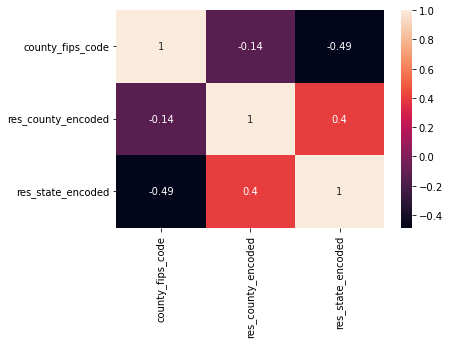

In [47]:
import seaborn as sns

corr = df2.corr(method = 'spearman')
sns.heatmap(corr, annot=True)

Based on spearman, county_fips_code and res_state are moderately correlated

In [48]:
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

calculate_vif(df=df2, features=feat)

,VIF,Tolerance
county_fips_code,1.050507,0.951921
res_county_encoded,1.195010,0.836813
res_state_encoded,1.250147,0.799906


Interestingly based on VIF, these three categories would not demonstrate high multicollinearity